<a href="https://colab.research.google.com/github/ElsiSahayaRenita/Customer-Personality-Analysis---Customer-Relationship/blob/main/CustomerPersonalityAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import  silhouette_score

In [2]:
df = pd.read_csv("/content/marketing_campaign.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **Exploratory Data Analysis EDA**

In [3]:
#checking any duplicate data 
df['ID'].nunique()

2240

## **Inference:**
    Total Customer Unique ID is 2240, so there is no duplicate data present in the dataset.

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
#dropping null values
df=df.dropna()

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [7]:
#convert Dt_Customer from object to datatime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [8]:
#creating new column Total Outlay the customer summing the total spending on wines, meat, fruits, fish, gold products
df['Total_Outlay'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [9]:
#creating new column  Total Purchase done by each customer summing web, catalog and store purchase
df['Total_Purchases'] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

In [10]:
#calculating age of each customers from the Year_Birth column given in dataset
PresentYear = datetime.datetime.now()
df['Age'] = PresentYear.year - df['Year_Birth']

Text(0.5, 1.0, 'Age Distribution')

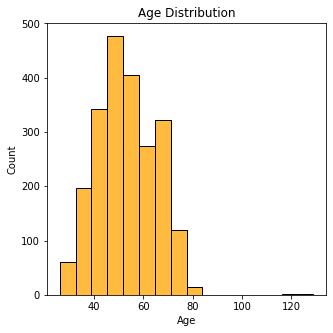

In [11]:
plt.figure(figsize=(5,5))
sns.histplot(df["Age"], bins=16, color='Orange')
plt.title("Age Distribution")

## **Inference:**
    Most of the customers are Middle Aged People, age group ranging from 40 to 60.


In [12]:
#As single alone absurd and yolo has same meaning so replacing it with single
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single','Absurd': 'Single', 'YOLO': 'Single'})

In [13]:
maritalstatus = df.Marital_Status.value_counts()
fig = px.pie(maritalstatus, values=maritalstatus.values, names=maritalstatus.index, title='Marital Status Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 4)))
fig.show() 


## **Inference:**
    Based on Marital Staus Plot Married Customers are of higher percentage.

In [14]:
#As for Education 2n Cycle also represent Master, replacing it with Master
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})

In [15]:
education = df.Education.value_counts()
fig = px.pie(education, values=education.values, names=education.index, title='Education Distribution', hole=.2,  color=education, color_discrete_map={'Graduation':'Orange',
                                 'Master':'lightblue',
                                 'phD':'pink',
                                 'Basic':'lightgreen'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show() 

## **Inference:**
    Thus From the plot we can interept that 50% of Customers are Graduated.

Text(0.5, 1.0, 'KidHome Distribution')

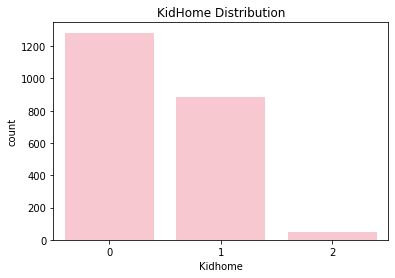

In [16]:
#Kidhome Distribution
sns.countplot(x = 'Kidhome', data = df,  color='pink')
plt.title('KidHome Distribution')

## **Inference:**
    From the above graph Most of the Customers don't have Kids.
    Also More than 800 Customers have Single kid.

Text(0.5, 1.0, 'Teen Home Distribution')

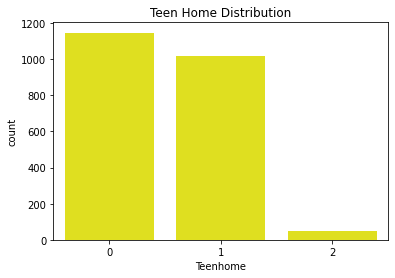

In [17]:
#TeenHome Distribution
sns.countplot(x='Teenhome', data=df, color="yellow")
plt.title("Teen Home Distribution")

## **Inference:**
    Most of the Customers don't have any Teens.
    More than 1000 Customers have a Single Teen in their homes.

Text(0.5, 1.0, 'Total Expenses')

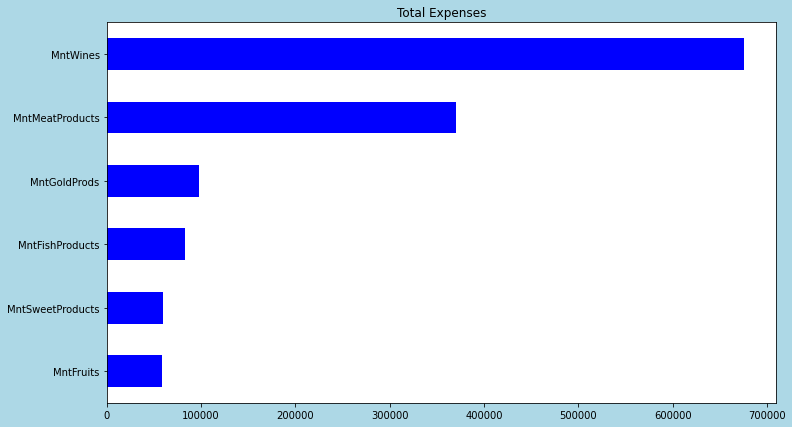

In [18]:
plt.figure(figsize=(12,7), facecolor='lightblue')
ax = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh', color ='Blue')
plt.title("Total Expenses")

## **Inference:**
    Comparing to other products Wine Products is  the most highest selling Product among Customers.
    Fruits is the least Selling Product.

Text(0.5, 1.0, 'Purchases')

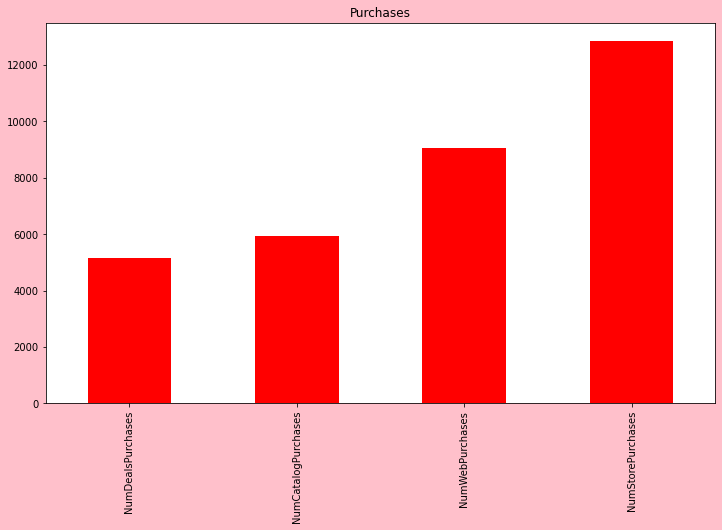

In [19]:
plt.figure(figsize=(12,7), facecolor='pink')
ax = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='bar', color="Red")
plt.title('Purchases')

## **Inference:**
    Purchase from Store has the highest sales, which conclude that Customers are more likely to purchase from stores.
    Deals Purchase has the least sales as deals are available for certain periods. 

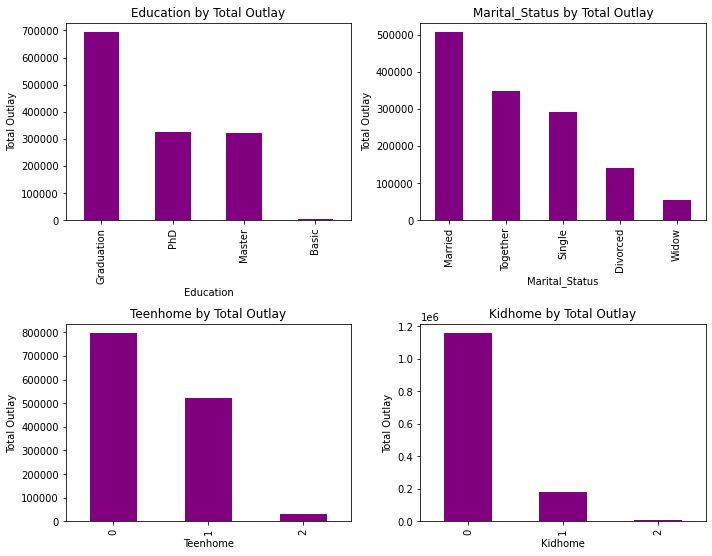

In [20]:
def bar(x,fig):
    plt.subplot(5,2,fig)
    df_groups =df.groupby(x)['Total_Outlay'].sum()
    df_groups.sort_values(ascending=False).plot(kind='bar',color='Purple')
    plt.title(x+' by Total Outlay')
    plt.ylabel('Total Outlay')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

bar('Education', 1)
bar('Marital_Status', 2)
bar('Teenhome', 3)
bar('Kidhome', 4)

plt.tight_layout()

## **Inference:**
    Customers from graduated educational level contributes the Highest Outlay.
    Customers that are Married has the Maximum Outlay.
    Customers that doesn’t have any teens at home contributes the Highest Outlay.
    Similarly Customers don't have any kids at home has the Highest number of Outlay.

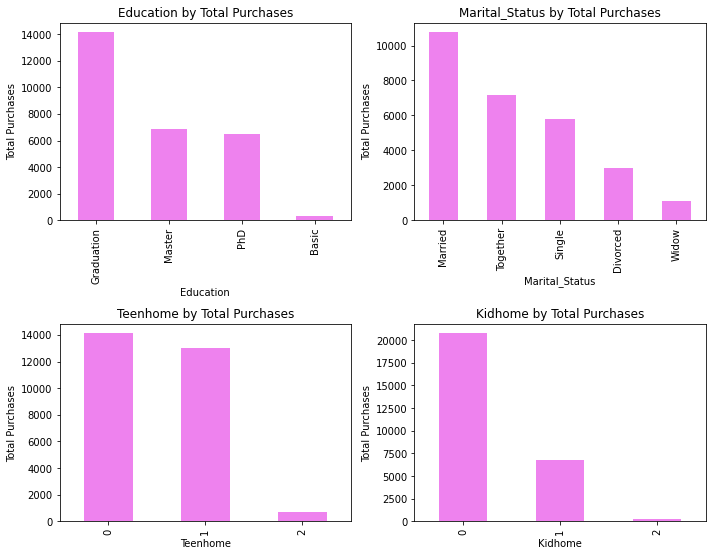

In [21]:
def bar(x,fig):
    plt.subplot(5,2,fig)
    df_groups =df.groupby(x)['Total_Purchases'].sum()
    df_groups.sort_values(ascending=False).plot(kind='bar', color='Violet')
    plt.title(x+' by Total Purchases')
    plt.ylabel('Total Purchases')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

bar('Education', 1)
bar('Marital_Status', 2)
bar('Teenhome', 3)
bar('Kidhome', 4)

plt.tight_layout()

## **Inference:**
    Customers who have Graduated has the most higher percentage of Total Purchase.
    Customers that are Married contributes the high number of Total Purchase compared to other Customers.
    Customers don't have any Kids and Teens at home purchase the most.

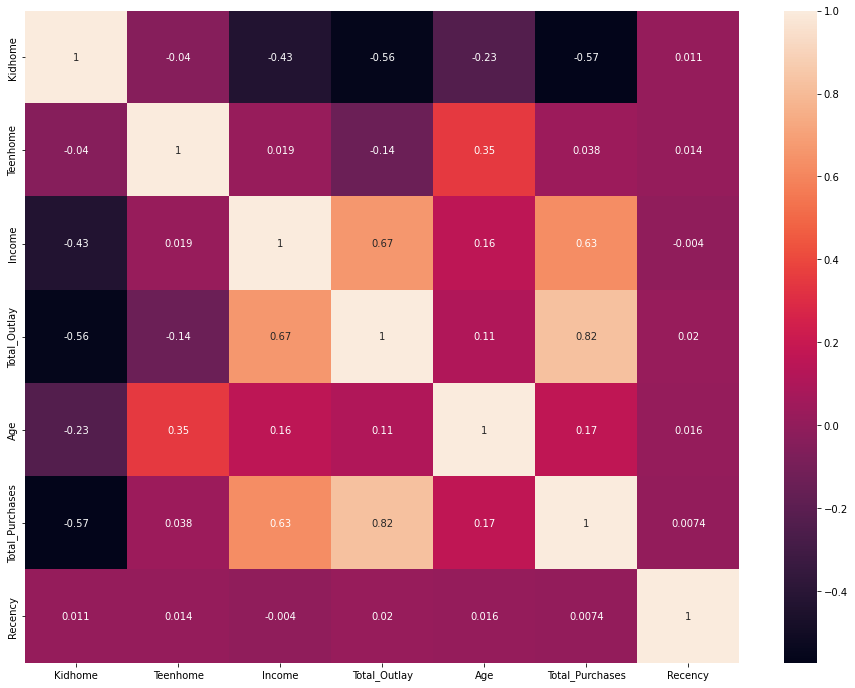

In [22]:
plt.figure(figsize=(16,12))
sns.heatmap(df[['Education', 'Marital_Status','Kidhome', 'Teenhome','Income', 'Total_Outlay','Age', 'Total_Purchases', 'Recency']].corr(), annot=True)
plt.show()

## **Inference:**
    The highest correlation is income and total outlay, income and total purchase, followed by total expenses and total purchases.

# **K Means Clustering**

### **Elbow Plot**

Text(0, 0.5, 'Inertia')

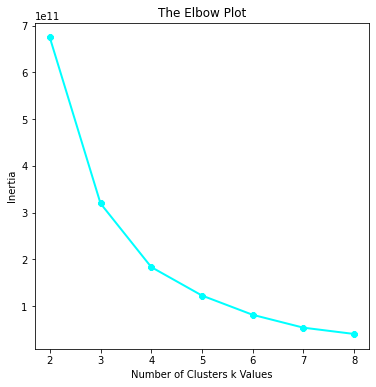

In [23]:
inertias = []
kvalues = range(2,9)
attribute = ['Income', 'Total_Outlay', 'Total_Purchases']

for k in kvalues:
   clust = KMeans(k, random_state=42, init='k-means++').fit(df[attribute])
   inertias.append(clust.inertia_)


plt.figure(figsize=(6,6))    
plt.title("The Elbow Plot")
plt.plot(kvalues, inertias, linewidth=2, color='cYAN', marker ="8")
plt.xlabel('Number of Clusters k Values')
plt.ylabel('Inertia')

# **Inference:**
    From the elbow plot as there is no location of a  sharp bend (knee) in the plot.
    When K value =4, there is a slight variation in the curve.


In [24]:
#attribute to numpy array
X = df[attribute].to_numpy()

In [44]:
#kmeans clusering

Kmean = KMeans(n_clusters=4)
Kmean.fit(X)


label=Kmean.predict(X)

**Silhouette Score**

In [45]:

#silhouette score 
score = silhouette_score(X, label)
print("when K value= 4", " the silhouette score=",score)

when K value= 4  the silhouette score= 0.5409785998608181


# **Inference:**
    As the Silhouette Score for K value =4 is 0.541.
    Which indicates that the sample is on or very close to the decision boundary separating two neighboring clusters. 
 

## **Visualize the Cluster Group**

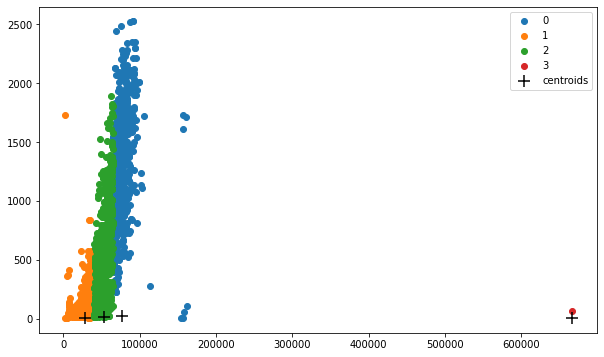

In [46]:
 # Getting the Centroids

centroids = Kmean.cluster_centers_  

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(10, 6)) 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,2] , marker="+", c="k", s=150, label="centroids")
plt.legend()
plt.show()

# **Cluster Identification**

In [47]:
#cluster grouping
predict = Kmean.predict(X)
cluster = df.copy()
cluster['Cluster'] = predict 

In [48]:
clusters = cluster.Cluster.value_counts()
fig = go.Figure(data=[go.Pie(labels=clusters.index, values=clusters.values,title='Clusters Percentage', pull=[0, 0, 0.1, 0,0])])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show() 


In [49]:
clusters

2    785
1    745
0    685
3      1
Name: Cluster, dtype: int64

# **INFERENCE:**
    cluster 1 & 2 - has maximum number of customers.
    cluster 3 has least number of Customers.

Text(0, 0.5, 'Income')

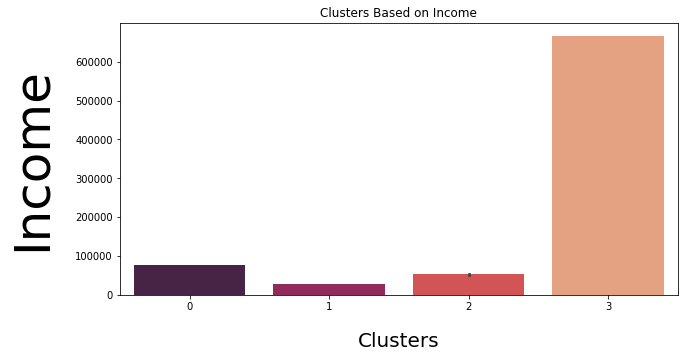

In [50]:
#Income vs Cluster
plt.figure(figsize=(10,5))

sns.barplot(data=cluster, x='Cluster', y = 'Income',palette='rocket')
plt.title("Clusters Based on Income")
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=50, labelpad=20)

# **INFERENCE:**
  From the  above Bar Plot we can interept that
     
*   Cluster 3 : Customer with a **very High Income**  

*   Cluster 0 : Customers with **High Income**.

*   Cluster 2 : Customer with  **Average Income**.

*   Cluster 1 : Customer with the **Least or Low Income**. 




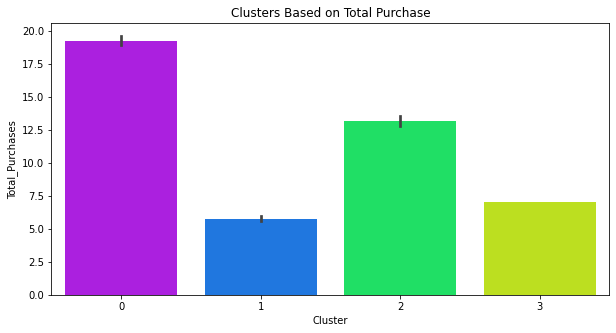

In [51]:
# total purchase vs clusters:

plt.figure(figsize=(10,5))
plt.title(f'Clusters Based on Total Purchase')
ax = sns.barplot(data=cluster, x='Cluster', y='Total_Purchases', palette='hsv_r')
plt.show()

# **INFERENCE:**
  From the above Bar Plot we can interept that
     
  *   Cluster 0 : Customers who have **Very High Amount of Purchases**.
  *   Cluster 2 : Customers with **High Amount of Purchases**.
  *   Cluster 3 : Customer grouped based on **Average Amount of Purchases**.
  *   Cluster 1 : Customers Come under **Least Number of Purchases**.





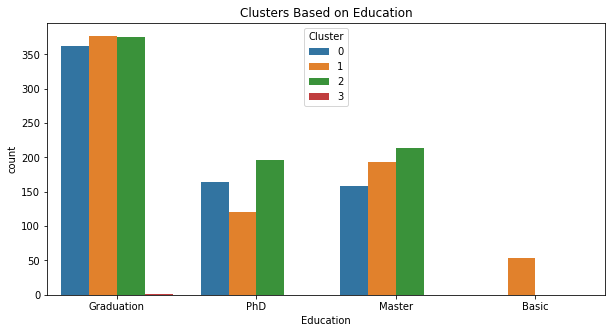

In [52]:
# education vs clusters

plt.figure(figsize=(10,5))
plt.title(f'Clusters Based on Education')
sns.countplot(data=cluster, x='Education', hue='Cluster')
plt.show()

# **INFERENCE:**
 From the above Count plot 
  
   *   Basic : Only Cluster1 has Basic Educated Customers. 
   *   Master: Cluster2 has more 2N Cycle educated Customer, Cluster0 has least Customer.
   *   PhD   : Cluster2 has More PhD Customers, Cluster1 has least Customers.
   *   Graduation : Graduated Customers are seen in all 4 Clusters.





Text(0, 0.5, 'Outlay')

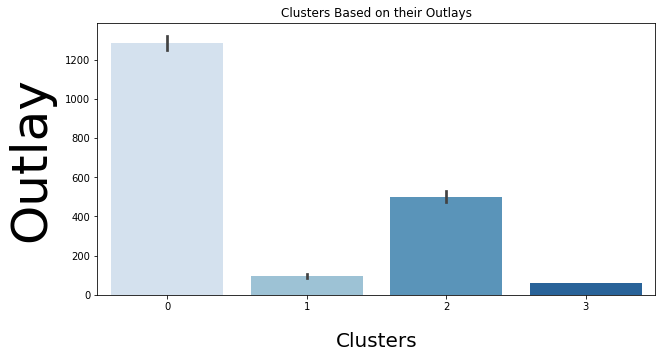

In [53]:
#Total Spending
plt.figure(figsize=(10,5))

sns.barplot(data=cluster, x='Cluster', y = 'Total_Outlay',palette='Blues')
plt.title("Clusters Based on their Outlays")
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Outlay', fontsize=50, labelpad=10)

# **INFERENCE:**
  From the above Bar Plot
   *  Cluster 0 : Customers who **Outlay their earnings the Most**.
   *  Cluster 2 : Customers who **spends high amount on Products**.
   *  Cluster 3 : Customers who **Outlays are the least**.
   *  Cluster 1 : Customers who **Outlays are average**.

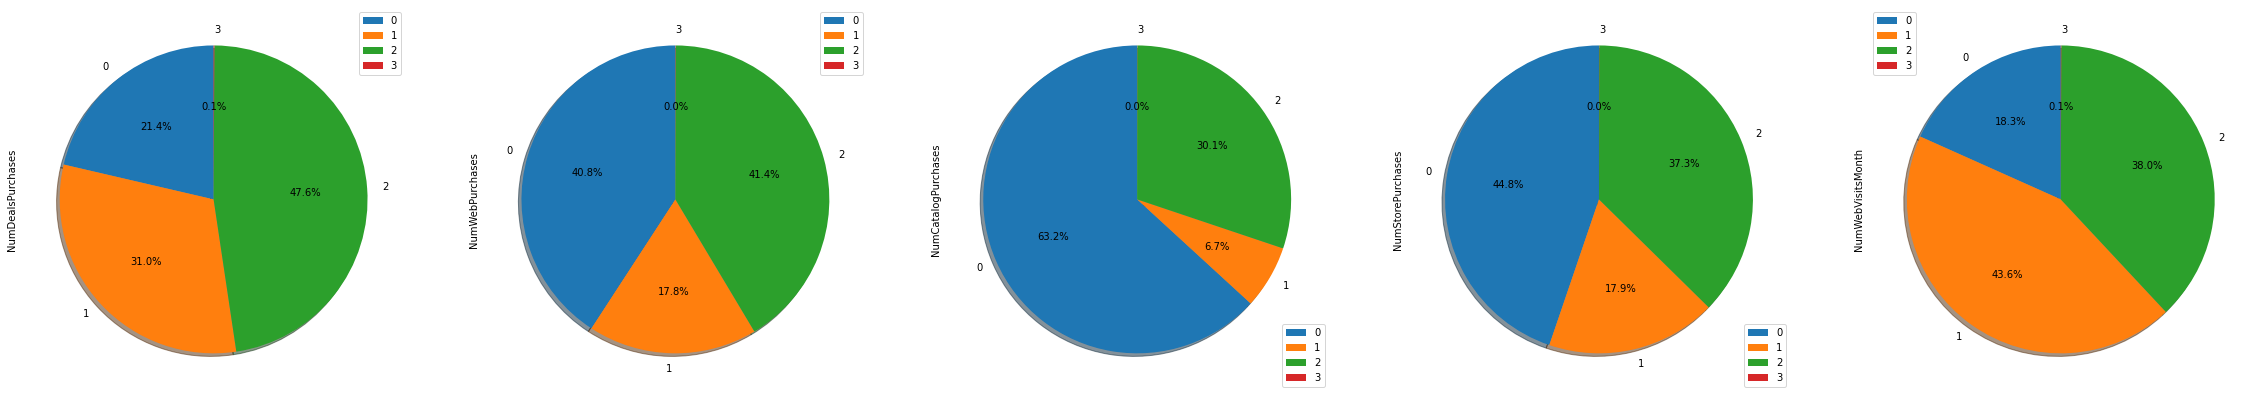

In [86]:
cluster_purchases = cluster.groupby('Cluster')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()
fig =cluster_purchases.plot(kind='pie', subplots=True, shadow = True  ,startangle=90,figsize=(40,40),autopct='%1.1f%%')


# **INFERENCE:**
  From the Bar Plot above
     
  *  Cluster 0 : Has 63% of Customers Who purchased from Catalogue.
  *  Cluster 1 : Includes Large Number of Customers who Frequently Visit the Purchase Website in a Month about 43% and 31% of Customers Purchased through Deals.
  *  Cluster 2: 47.6% Customers Purchased through Deals.
  *  Cluster 3: 0.1% of Customers  from Who Purchased through Deals and  frequently Visit Purchase Website in  a Month.

# **Segmentation Of Customers**
 
**Silver Customers : CLUISTER 3**
  * High Income, Graduated, Low Purchase - 0.1% Deal Purchase.

**Gold Customers : CLUSTER 1**
  * Low Income, Basic and Graduated, Low Purchase - 31% Deal Purchase & 43% Website Visit.

**Diamond Customers : CLUSTER 2**
  *  Average Income, Very Highly Educated, High Purchase - 47% Deal, 41.4% Web and 37% Store Purchase.

**Platinum Customers : CLUSTER 0**
  *  High Income, Highly Educated, very High Purchases - 44% Store, 40% Web and 63% Catalogue Purchase.
    